In [1]:
from qiskit.test.mock import FakeVigo
backend = FakeVigo()

In [2]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx']

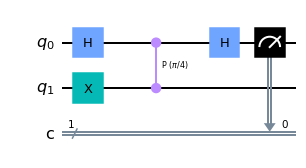

In [3]:
import numpy as np
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.cp(np.pi/4, 0, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw(output='mpl')

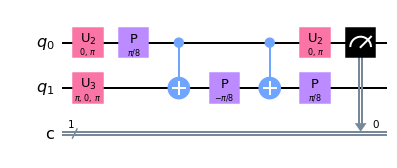

In [4]:
qc_basis = qc.decompose()
qc_basis.draw(output='mpl')

In [5]:
print('Original depth:', qc.depth(), 'Decomposed Depth:', qc_basis.depth())

Original depth: 4 Decomposed Depth: 7


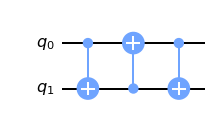

In [6]:
swap_circ = QuantumCircuit(2)
swap_circ.swap(0, 1)
swap_circ.decompose().draw(output='mpl')

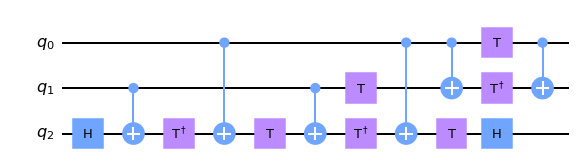

In [7]:
ccx_circ = QuantumCircuit(3)
ccx_circ.ccx(0, 1, 2)
ccx_circ.decompose().draw(output='mpl')

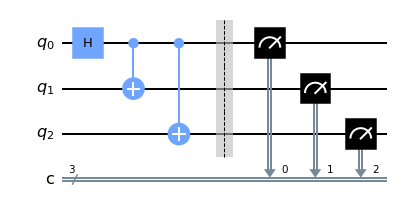

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo
backend = FakeVigo()

ghz = QuantumCircuit(3, 3)
ghz.h(0)
ghz.cx(0,range(1,3))
ghz.barrier()
ghz.measure(range(3), range(3))
ghz.draw(output='mpl')

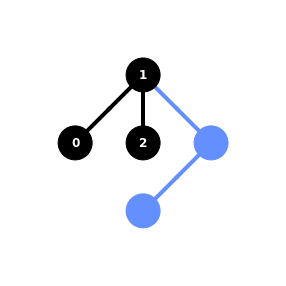

In [9]:
new_circ_lv0 = transpile(ghz, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

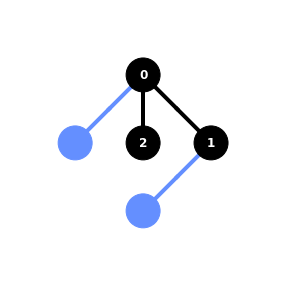

In [10]:
new_circ_lv3 = transpile(ghz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

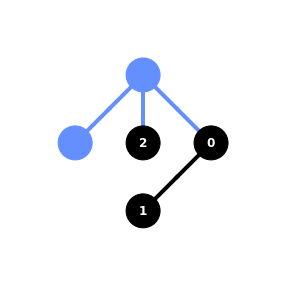

In [11]:
# Virtual -> physical
#    0    ->    3
#    1    ->    4
#    2    ->    2

my_ghz = transpile(ghz, backend, initial_layout=[3, 4, 2])
plot_circuit_layout(my_ghz, backend)

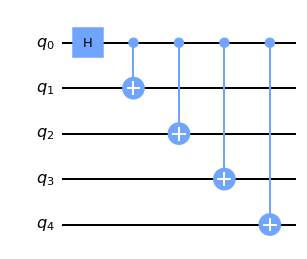

In [12]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.test.mock import FakeBoeblingen
backend = FakeBoeblingen()

ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0,range(1,5))
ghz.draw(output='mpl')

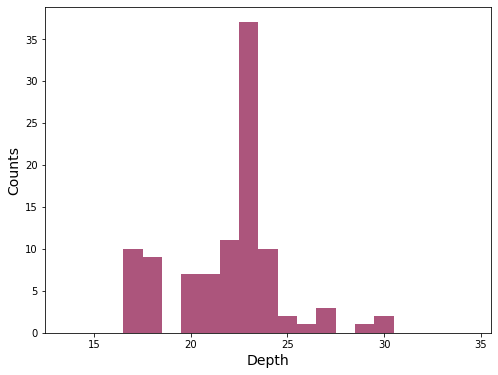

In [13]:
depths = []
for _ in range(100):
   depths.append(transpile(ghz,
                           backend,
                           initial_layout=[7, 0, 4, 15, 19],
                          ).depth())

plt.figure(figsize=(8, 6))
plt.hist(depths, bins=list(range(14,36)), align='left', color='#AC557C')
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Counts', fontsize=14);

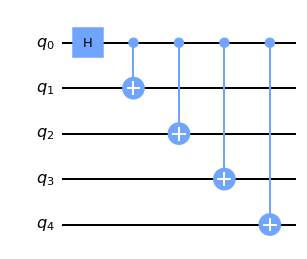

In [14]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.test.mock import FakeBoeblingen
backend = FakeBoeblingen()

ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0,range(1,5))
ghz.draw(output='mpl')

In [15]:
for kk in range(4):
   circ = transpile(ghz, backend, optimization_level=kk)
   print('Optimization Level {}'.format(kk))
   print('Depth:', circ.depth())
   print('Gate counts:', circ.count_ops())
   print()

Optimization Level 0
Depth: 14
Gate counts: OrderedDict([('cx', 19), ('u2', 1)])

Optimization Level 1
Depth: 7
Gate counts: OrderedDict([('cx', 9), ('u2', 1)])

Optimization Level 2
Depth: 12
Gate counts: OrderedDict([('cx', 14), ('u2', 1)])

Optimization Level 3
Depth: 8
Gate counts: OrderedDict([('cx', 7), ('u2', 1)])



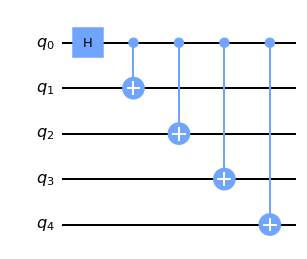

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit.test.mock import FakeBoeblingen
backend = FakeBoeblingen()

ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0,range(1,5))
ghz.draw(output='mpl')

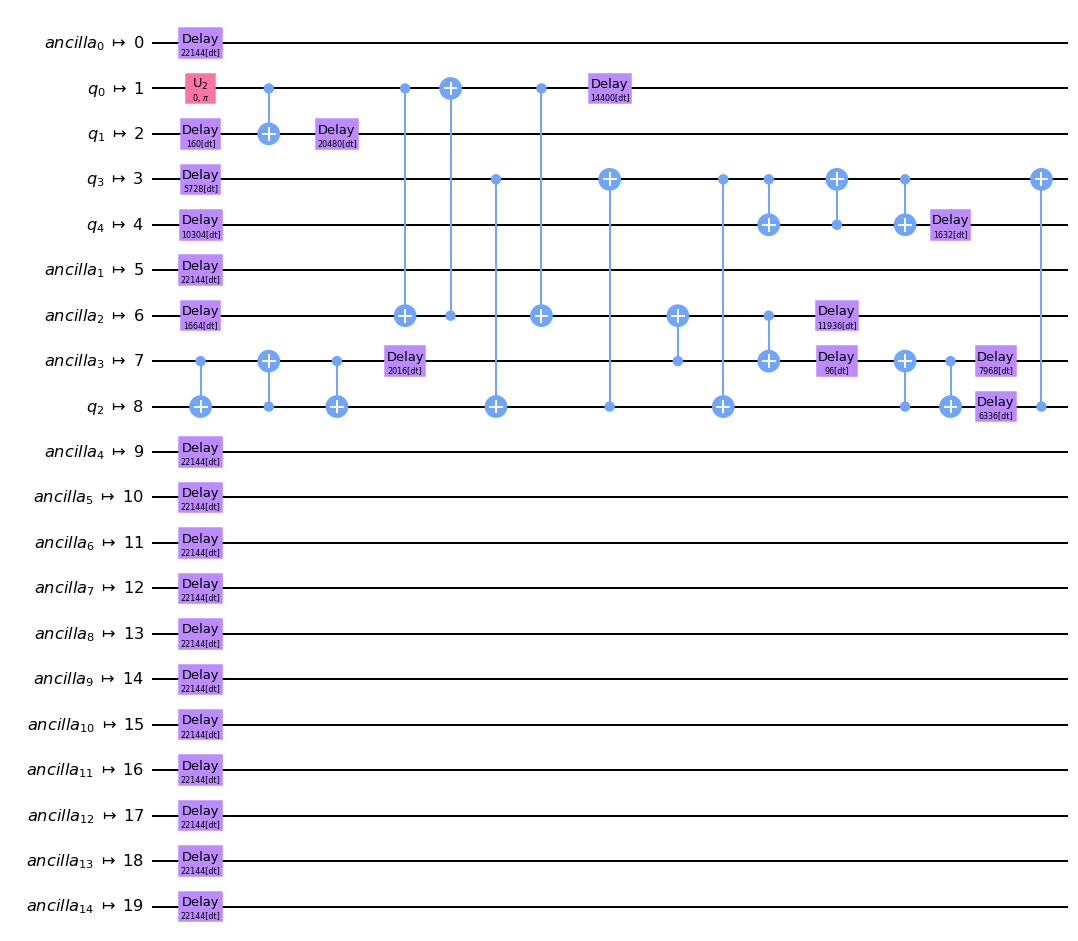

In [17]:
circ = transpile(ghz, backend, scheduling_method="asap")
circ.draw(output='mpl')

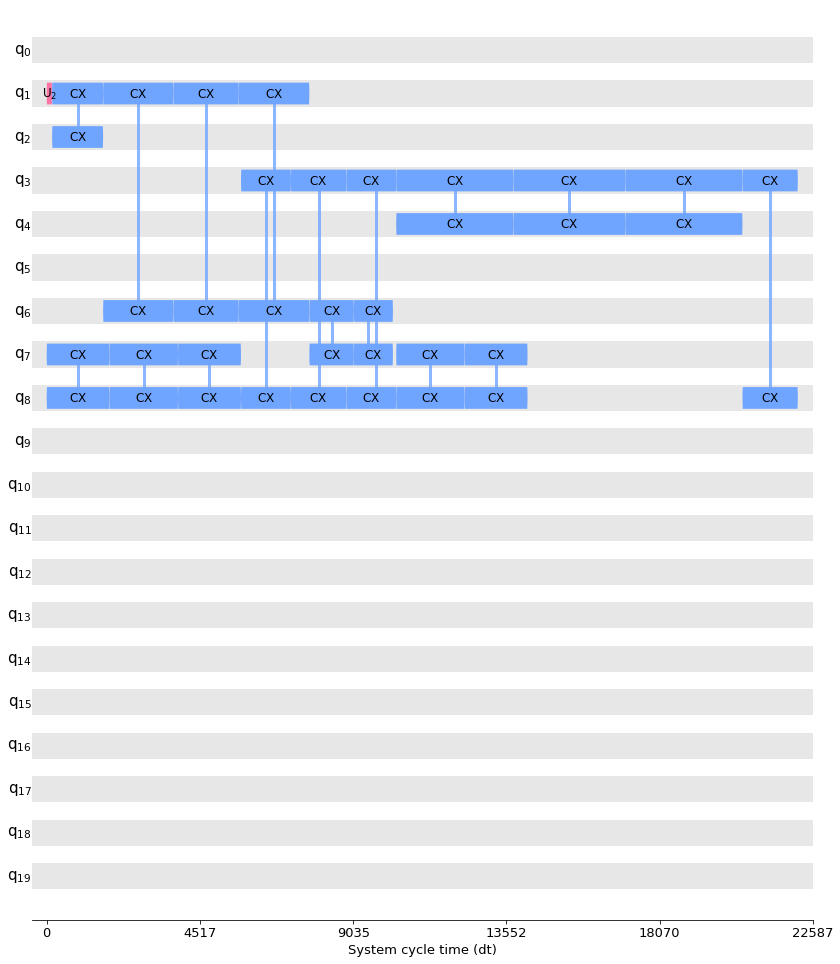

In [18]:
from qiskit.visualization.timeline import draw as timeline_draw

timeline_draw(circ)